<a href="https://colab.research.google.com/github/subir2210/DATASET/blob/main/Code/Data%20Preprocessing/Krish%20Naik/lab/Feature%20Engineering-%20Missing%20Values%20Day%203.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### Arbitrary Value Imputation

this technique was derived from kaggle competition
It consists of replacing NAN by an arbitrary value

Advantages

    Easy to implement
    Captures the importance of missingess if there is one

Disadvantages

    Distorts the original distribution of the variable
    If missingess is not important, it may mask the predictive power of the original variable by distorting its distribution
    Hard to decide which value to use


In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



In [4]:
df=pd.read_csv("https://raw.githubusercontent.com/subir2210/DATASET/main/Code/Data%20Preprocessing/Krish%20Naik/titanic.csv", usecols=["Age","Fare","Survived"])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [5]:
def impute_nan(df,variable):
    df[variable+'_zero']=df[variable].fillna(0)
    df[variable+'_hundred']=df[variable].fillna(100)
impute_nan(df,'Age')  

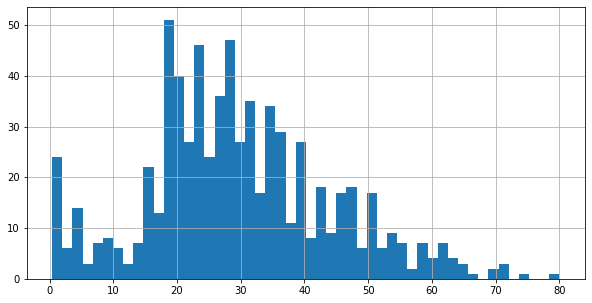

In [6]:
f,ax = plt.subplots(figsize=(10,5))
df['Age'].hist(bins=50)

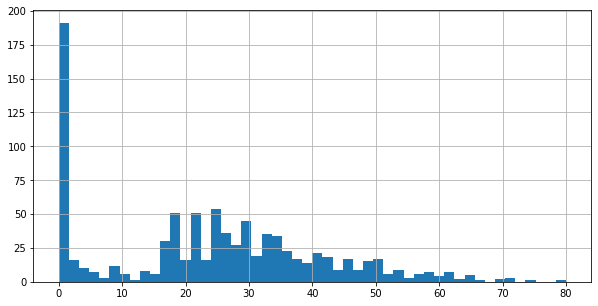

In [7]:
f,ax = plt.subplots(figsize=(10,5))
df['Age_zero'].hist(bins=50)

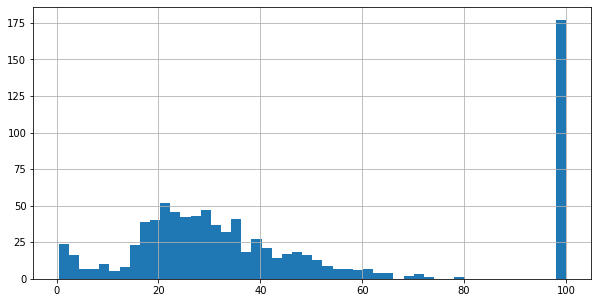

In [8]:
f,ax = plt.subplots(figsize=(10,5))
df['Age_hundred'].hist(bins=50)

In [9]:
df.head()

,Survived,Age,Fare,Age_zero,Age_hundred
0,0,22.0,7.2500,22.0,22.0
1,1,38.0,71.2833,38.0,38.0
2,1,26.0,7.9250,26.0,26.0
3,1,35.0,53.1000,35.0,35.0
4,0,35.0,8.0500,35.0,35.0


##### How To Handle Categroical Missing Values

##### Frequent Category Imputation

In [10]:
df1=pd.read_csv('https://raw.githubusercontent.com/subir2210/DATASET/main/Dataset%20Files/HouseData.csv', usecols=['BsmtQual','FireplaceQu','GarageType','SalePrice'])

In [11]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   BsmtQual     1423 non-null   object
 1   FireplaceQu  770 non-null    object
 2   GarageType   1379 non-null   object
 3   SalePrice    1460 non-null   int64 
dtypes: int64(1), object(3)
memory usage: 45.8+ KB


In [12]:
df1.isnull().sum()

BsmtQual        37
FireplaceQu    690
GarageType      81
SalePrice        0
dtype: int64

In [13]:
df1.isnull().mean().sort_values()*100

SalePrice       0.000000
BsmtQual        2.534247
GarageType      5.547945
FireplaceQu    47.260274
dtype: float64

In [14]:
df2 = df1.select_dtypes('object').mode()

In [16]:
for i in df2.columns:
    df1[i+'_New'] = df1[i].fillna(df2[i][0])

Adding a variable to capture NAN

In [31]:
for j in df2.columns:
    df1[j+'_NAN'] = np.where(df1[j].isnull(),"MV",df1[j])

In [32]:
df1.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQual_New,FireplaceQu_New,GarageType_New,BsmtQual_NAN,FireplaceQu_NAN,GarageType_NAN
0,Gd,NaN,Attchd,208500,Gd,Gd,Attchd,Gd,MV,Attchd
1,Gd,TA,Attchd,181500,Gd,TA,Attchd,Gd,TA,Attchd
2,Gd,TA,Attchd,223500,Gd,TA,Attchd,Gd,TA,Attchd
3,TA,Gd,Detchd,140000,TA,Gd,Detchd,TA,Gd,Detchd
4,Gd,TA,Attchd,250000,Gd,TA,Attchd,Gd,TA,Attchd


In [34]:
df1.isnull().sum()

BsmtQual            37
FireplaceQu        690
GarageType          81
SalePrice            0
BsmtQual_New         0
FireplaceQu_New      0
GarageType_New       0
BsmtQual_NAN         0
FireplaceQu_NAN      0
GarageType_NAN       0
dtype: int64

In [46]:
df1.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQual_New,FireplaceQu_New,GarageType_New,BsmtQual_NAN,FireplaceQu_NAN,GarageType_NAN
0,Gd,NaN,Attchd,208500,Gd,Gd,Attchd,Gd,MV,Attchd
1,Gd,TA,Attchd,181500,Gd,TA,Attchd,Gd,TA,Attchd
2,Gd,TA,Attchd,223500,Gd,TA,Attchd,Gd,TA,Attchd
3,TA,Gd,Detchd,140000,TA,Gd,Detchd,TA,Gd,Detchd
4,Gd,TA,Attchd,250000,Gd,TA,Attchd,Gd,TA,Attchd
